## Using SQLite w/ pandas

Basic of SQL: 
https://www.digitalocean.com/community/tutorials/sqlite-vs-mysql-vs-postgresql-a-comparison-of-relational-database-management-systems

Comparison between pandas and SQL:
https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

Working with SQLite Databases using Python and Pandas:
https://www.dataquest.io/blog/python-pandas-databases/

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("webtoon.db")
df = pd.read_csv("webtoons_data.csv")

In [3]:
df.to_sql('webtoon',conn, if_exists='append',index=False)

#### How to query all the webtoons with "The" in the name?

In [5]:
pd.read_sql_query('SELECT Name, Genre, Episode FROM webtoon WHERE Name LIKE "The%";',conn)

,Name,Genre,Episode
0,The Four of Them,Drama,27
1,The Sound of Your Heart,Comedy,467
2,The Devil is a Handsome Man,Romance,74
3,The World Where I Belong,Drama,53
4,The Gamer,Fantasy,284
5,The God of High School,Action,422
6,The Kiss Bet,Romance,11
7,The Croaking,Fantasy,29
8,The Fever King,Fantasy,6
9,The Vault of Horror: A Collection of Nightmares,Thriller,23


In [6]:
pd.read_sql_query('SELECT COUNT(*) FROM webtoon;',conn)

,COUNT(*)
0,293


## Using SQL Magic

Source: https://github.com/catherinedevlin/ipython-sql

In [7]:
%load_ext sql

In [9]:
%sql sqlite:///webtoon.db 

'Connected: @webtoon.db'

#### Which types of genre genereally get a score higher than 9? score lower than 6?

In [11]:
%%sql 
WITH new_wt AS 
(SELECT *,
    CASE 
        WHEN Score > 9 THEN 'High'
        WHEN Score < 6 THEN 'Low'
    END AS 'NEW'
FROM webtoon)
SELECT Genre, COUNT(*) AS 'High-Low Scale'
FROM new_wt
WHERE NEW = 'High'
GROUP BY 1
ORDER BY 1;

 * sqlite:///webtoon.db
   sqlite:///webtoons.db
Done.


Genre,High-Low Scale
Action,19
Comedy,32
Drama,45
Fantasy,56
Horror,2
Romance,34
Sci-fi,12
Slice of life,25
Sports,1
Superhero,8


In [12]:
%%sql 
WITH new_wt AS 
(SELECT *,
    CASE 
        WHEN Score > 9 THEN 'High'
        WHEN Score < 6 THEN 'Low'
    END AS 'NEW'
FROM webtoon)
SELECT Genre, COUNT(*) AS 'High-Low Scale'
FROM new_wt
WHERE NEW = 'Low'
GROUP BY 1
ORDER BY 1;

 * sqlite:///webtoon.db
   sqlite:///webtoons.db
Done.


Genre,High-Low Scale
Comedy,3
Drama,1


#### Average episode for each genres? 

In [13]:
result = %sql SELECT Genre, AVG(Episode) FROM webtoon GROUP by 1 ORDER BY 1;

 * sqlite:///webtoon.db
   sqlite:///webtoons.db
Done.


In [14]:
# Using pandas
result.DataFrame()

,Genre,AVG(Episode)
0,Action,96.578947
1,Comedy,182.697674
2,Drama,62.941176
3,Fantasy,120.322581
4,Horror,23.333333
5,Informative,25.000000
6,Romance,91.314286
7,Sci-fi,111.642857
8,Slice of life,181.971429
9,Sports,17.000000


<BarContainer object of 12 artists>

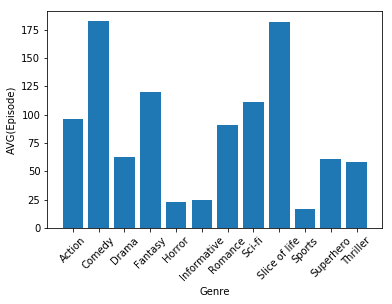

In [15]:
%matplotlib inline
result.bar()